# Natalia Organek - lab 8

In [248]:
import os
import requests
import regex as re
from collections import Counter
import nltk
import math
from tqdm import tqdm
import time
import collections
from matplotlib import pyplot as plt

## Sort bills according to their size and take top 50 (largest) bills.

In [2]:
directory = '../lab1/ustawy'
filenames = os.listdir(directory)

In [92]:
corpus = []
html_regex = r'<[\s\S]*?>'


for filename in filenames:
    with open(os.path.join(directory, filename), encoding="UTF-8") as f:
        bill = f.read()
        bill = re.sub(html_regex, '', bill)
        bill = bill.replace('\xad', '').replace('\xa0', ' ')
        count = len(bill)
        
        corpus.append((count, filename, bill))

In [93]:
corpus.sort(key = lambda a: (-a[0], a[1]))

In [94]:
top_50 = [bill for _, filename, bill in corpus[:50]]

## Use the lemmatized and sentence split documents (from ex. 5) to identify the expressions that consist of consecutive words starting with a capital letter (you will have to look at the inflected form of the word to check its capitalization) that do not occupy the first position in a sentence. E.g. the sentence:
Wczoraj w Krakowie miało miejsce spotkanie prezydentów Polski i Stanów Zjednoczonych.
should yield the following entries: Kraków, Polska, Stan Zjednoczony.

In [146]:
def ask_krnnt(text):
    answer = requests.post('http://localhost:9201/', data=text.encode('utf-8')).text
    answer_words = answer.split('\n')
    words = [word for word in answer_words if word]
    return words

In [175]:
# import String

def lemmatize_and_tag_text(text):
    words = ask_krnnt(text)
#     get_lem_tag(words)
#     return [get_lem_tag(word) for word in words]
    return get_lem_tag(words)

def is_ok(word):
    return word and not '\tnewline' in word and not '\tnone' in word and word[0].isupper()

def ch_case(word, to_change):
    if word.istitle():
        return to_change.title()
    if word.isupper():
        return to_change.upper()
    else:
        return to_change
    
def get_lem_tag(words):
    bag = []
    nxt_i = 0
    for i in range(0, len(words), 2):
        if i < nxt_i:
            continue
        
        word = words[i].strip()
        if is_ok(word):
            t_word = word.split('\t')[0]
            full = [ch_case(t_word, words[i+1].split('\t')[1])]
            nxt_i = i + 2
            while is_ok(words[nxt_i].strip()):
                word = words[nxt_i].strip()
                t_word = word.split('\t')[0]
                full.append(ch_case(t_word, words[nxt_i+1].split('\t')[1]))
                nxt_i += 2

            bag.append(' '.join(full))
    return bag

In [176]:
lemmatized_corpus = lemmatize_and_tag_text('Ala ma kota. Jan ma psa CIAPEK, Reksia. Koty mają zebry do Stanów Zjednoczonych Ameryki i Wysp Kanaryjskich! Hura? Hura... Tak.')
print(lemmatized_corpus)

['CIAPEK', 'Reksia', 'Stany Zjednoczony Ameryka', 'Wyspa Kanaryjski']


In [230]:
lemmatized_acts = []

for corpus_text in tqdm(top_50):
    lemmatized_acts.extend(lemmatize_and_tag_text(corpus_text))

100%|██████████| 50/50 [17:46<00:00, 21.33s/it]


## Compute the frequency of each identified expression and print 50 results with the largest number of occurrences.


In [231]:
top_50_names = Counter(lemmatized_acts).most_common(50)

In [260]:
sorted(Counter(lemmatized_acts), key=lambda x: -len(x))[:10]

['Przewodniczący Komisja Krajowy Niezależny Samorządny Związek',
 'Polski Scaloną Nomenklatura Towarowy Handel Zagraniczny PCN',
 'DO KTÓRY STOSOWAĆ SIĘ PROCEDURA ZAWIESZENIE POBÓR AKCYZA I',
 'Przewodniczący Ogólnopolski Porozumienie Związek Zawodowy',
 'Biuletyn Informacja Publiczny Urząd Regulacja Energetyka',
 'Krajowy Związek Kas Powszechny Ubezpieczenie Zdrowotny',
 'Państwowy Fundusz Rehabilitacja Osoba Niepełnosprawny',
 'Centralny Rejestr Członek Otwarty Fundusz Emerytalny',
 'Krajowy Spółdzielczy Kasa OszczędnościowoKredytowej',
 'Powszechny Elektroniczny System Ewidencja Ludność']

In [264]:
sorted(Counter(lemmatized_acts), key=lambda x: (len(x), x[0]))[:20]

['A',
 'B',
 'C',
 'D',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'P',
 'Q',
 'R',
 'S',
 'U',
 'V',
 'W',
 'X',
 'Z',
 'B1']

In [232]:
top_50_names

[('Numer', 4311),
 ('Rzeczpospolita Polski', 461),
 ('Kodeks', 449),
 ('Policja', 413),
 ('Minister', 350),
 ('Polski', 338),
 ('Ustawa', 334),
 ('Skarb Państwo', 319),
 ('Prawo', 308),
 ('Rada Minister', 279),
 ('Kasa Chory', 260),
 ('Straż Graniczny', 231),
 ('Unia Europejski', 228),
 ('Rada', 206),
 ('Dziennik', 206),
 ('Fundusz', 193),
 ('Zakład', 193),
 ('Sprawiedliwość', 180),
 ('Urząd', 167),
 ('Państwo', 166),
 ('Państwowy Straż Pożarny', 166),
 ('Prezes Urząd', 155),
 ('I', 154),
 ('Obrona Narodowy', 148),
 ('Finanse', 143),
 ('Rzeczpospolita', 138),
 ('Urząd Patentowy', 138),
 ('Państwowy Komisja Wyborczy', 132),
 ('II', 126),
 ('Prezes', 121),
 ('Komisja', 117),
 ('Minister Sprawiedliwość', 115),
 ('Urząd Ochrona Państwo', 112),
 ('Minister Obrona Narodowy', 105),
 ('Biuro', 102),
 ('Administracja', 97),
 ('Zmiana', 97),
 ('Sejm', 96),
 ('U', 93),
 ('Wolny Handel', 91),
 ('Komisja Wyborczy', 90),
 ('III', 85),
 ('Europejski', 84),
 ('Sąd Wysoki', 83),
 ('Kasa', 81),
 ('WYBOR

## Apply the NER algorithm to identify the named entities in the same set of documents (not lemmatized) using the n82 model.

In [192]:
lpmn = 'any2txt|wcrft2|liner2({"model":"n82"})'
email_address = 'kulczycka@student.agh.edu.pl'
BASE_URL = 'http://ws.clarin-pl.eu/nlprest2/base'
RESULT_DIRECTORY = 'done'

In [233]:
def start_task(text):
    data = {'lpmn': lpmn, 'user': email_address, 'text': text}
    return requests.post(f'{BASE_URL}/startTask/', json=data).text


def monitor_task(task_id, max_attempts=5):     
    status = 'QUEUE'
    value = None
    
    attempts = 0
    while status != 'DONE' and attempts < max_attempts:
        response = requests.get(f'{BASE_URL}/getStatus/{task_id}').json()
        status = response['status']
        if status == 'DONE':
            value = response['value']
        attempts += 1
        time.sleep(0.5)

    if status == 'ERROR':
        print(f'Error: {result}')

    return value

In [284]:
task_ids = [
    start_task(text)
    for text
    in tqdm(top_50)
]

In [239]:
done_tasks = set()

with tqdm(total=len(task_ids), position=0, leave=True) as pbar:
    while pbar.n < pbar.total:
        for file_name, task_id in enumerate(task_ids):    
            if task_id in done_tasks:
                continue

            result = monitor_task(task_id)

            if result == None:
                continue

            file_id = result[0]['fileID']
            response = requests.get(f'{BASE_URL}/download{file_id}')

            with open(f'{RESULT_DIRECTORY}/{file_name}.ccl', 'w', encoding='utf-8') as file:
                file.write(response.content.decode('utf-8'))

            done_tasks.add(task_id)
            pbar.update()

100%|██████████| 50/50 [04:52<00:00,  5.85s/it]


## Plot the frequency (histogram) of the coarse-grained classes (e.g. nam_adj, nam_eve, nam_fac).

In [240]:
class Token:
    
    def __init__(self, orth, base, ctag):
        self.orth = orth
        self.base = base
        self.ctag = ctag
        
    def get_orth(self):
        return self.orth
    
    def get_base(self):
        return self.base
    
    def get_ctag(self):
        return self.ctag
        

class Annotation:
    
    def __init__(self, category, tokens):
        self.category = category
        self.tokens = tokens
        self.lemma = self.get_orth()
        
    def get_category(self):
        return self.category
    
    def get_tokens(self):
        return self.tokens
    
    def get_orth(self):
        return " ".join([token.get_orth() for token in self.tokens])

    def get_base(self):
        return " ".join([token.get_base() for token in self.tokens])
    
    def get_ctag(self):
        return " ".join([token.get_ctag() for token in self.tokens])
    
    def get_space(self):
        return " ".join(["True" for token in self.tokens])
    
    def get_lemma(self):
        return self.lemma
    
    def set_lemma(self, lemma):
        self.lemma = lemma

    def __str__(self):
        return "[%s] %s" % (self.get_category(), self.get_lemma())

In [241]:
import xml.etree.ElementTree as ET

def sentence_ner(sentence):
    channels = {}
    for token in sentence.iter("tok"):
        orth = token.find("./orth").text
        base = token.find("./lex/base").text
        ctag = token.find("./lex/ctag").text
        t = Token(orth, base, ctag)
        for channel in token.iter("ann"):            
            index = int(channel.text)
            chan = channel.attrib["chan"]            
            if index > 0:                
                channels.setdefault(chan, {}) \
                        .setdefault(index, []) \
                        .append(t)
                
    annotations = []
    for (ann_type, group) in channels.items():
        for tokens in group.values():            
            an = Annotation(ann_type, tokens)
            annotations.append(an)
    
    return annotations
                

def ccl_ner(ccl):
    tree = ET.parse(ccl)
    annotations = []
    for sentence in tree.iter("sentence"):
        annotations += sentence_ner(sentence)
    return annotations

In [283]:
coarse_grained_class = []

for file in tqdm([file for file in os.listdir(RESULT_DIRECTORY) if file.endswith('.ccl')]):
    annotations = ccl_ner(os.path.join(RESULT_DIRECTORY, file))
    for annotation in annotations:
        category = annotation.get_category()
        coarse_category = '_'.join(category.split('_')[:2])
        coarse_grained_class.append(coarse_category)
        
coarse_grained_class_counter = Counter(coarse_grained_class)

<BarContainer object of 9 artists>

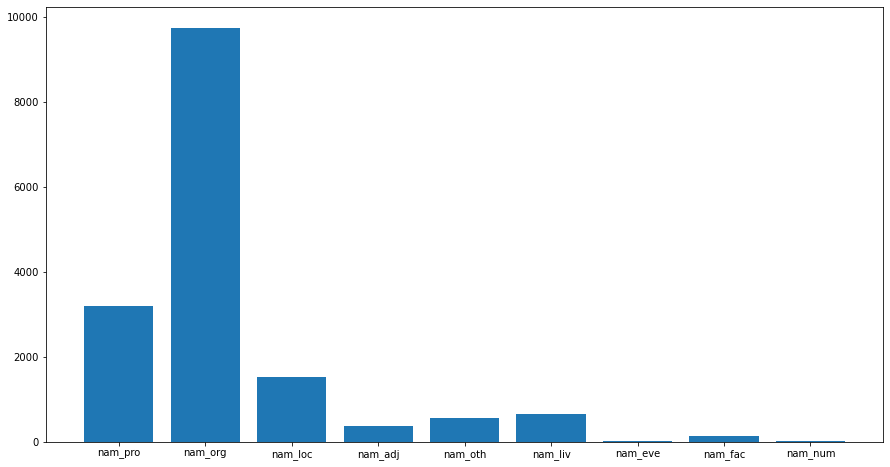

In [243]:
plt.figure(figsize=(15, 8))
plt.bar(coarse_grained_class_counter.keys(), coarse_grained_class_counter.values())

## Display 10 most frequent Named Entities for each coarse-grained type.

In [244]:
coarse_grained_class_entity_counter = collections.defaultdict(lambda: collections.defaultdict(int))

for file in tqdm([file for file in os.listdir(RESULT_DIRECTORY) if file.endswith('.ccl')]):
    annotations = ccl_ner(os.path.join(RESULT_DIRECTORY, file))
    for annotation in annotations:
        category = annotation.get_category()
        entity = annotation.get_lemma()
        coarse_category = '_'.join(category.split('_')[:2])
        coarse_grained_class_entity_counter[coarse_category][entity] += 1

100%|██████████| 50/50 [00:36<00:00,  1.38it/s]


In [245]:
for category, entities in coarse_grained_class_entity_counter.items():
    print('-'*111)
    for entity, count in list(sorted(entities.items(), key=lambda pair: -pair[1]))[:10]:
        print(f'| {category} | {str(count).ljust(4)} | {entity.ljust(90)} |')
print('-'*111)

---------------------------------------------------------------------------------------------------------------
| nam_pro | 1534 | Dz . U .                                                                                   |
| nam_pro | 80   | Dz . Urz                                                                                   |
| nam_pro | 71   | Ordynacja podatkowa                                                                        |
| nam_pro | 64   | Kodeksu karnego                                                                            |
| nam_pro | 62   | Monitor Polski                                                                             |
| nam_pro | 51   | Spraw Wewnętrznych                                                                         |
| nam_pro | 35   | Kodeksu postępowania administracyjnego                                                     |
| nam_pro | 33   | Kodeksu postępowania karnego                                                         

## Display 50 most frequent Named Entities including their count and fine-grained type.

In [246]:
fine_grained_class_entity_counter = collections.defaultdict(int)

for file in tqdm([file for file in os.listdir(RESULT_DIRECTORY) if file.endswith('.ccl')]):
    annotations = ccl_ner(os.path.join(RESULT_DIRECTORY, file))
    for annotation in annotations:
        category = annotation.get_category()
        entity = annotation.get_lemma()
        fine_grained_class_entity_counter[(entity, category)] += 1

100%|██████████| 50/50 [00:37<00:00,  1.35it/s]


In [247]:
sorted_fine_grained_class_entity_counter = sorted(
    fine_grained_class_entity_counter.items(),
    key=lambda pair: -pair[1]
)

print('-'*107)
for entity, count in sorted_fine_grained_class_entity_counter[:50]:
    entity, category = entity
    print(f'| {str(count).ljust(4)} | {entity.ljust(62)}| {category.ljust(32)} |')
print('-'*107)

-----------------------------------------------------------------------------------------------------------
| 1534 | Dz . U .                                                      | nam_pro_media_periodic           |
| 812  | Rzeczypospolitej Polskiej                                     | nam_loc_gpe_country              |
| 295  | Skarbu Państwa                                                | nam_org_institution              |
| 293  | zł                                                            | nam_oth_currency                 |
| 290  | Unii Europejskiej                                             | nam_org_organization             |
| 261  | Rada Ministrów                                                | nam_org_institution              |
| 233  | Minister Sprawiedliwości                                      | nam_org_institution              |
| 213  | Prezes Rady Ministrów                                         | nam_org_institution              |
| 205  | Państwowej Straży P

In [271]:
sorted_fine_grained_class_entity_counter = sorted(
    fine_grained_class_entity_counter.items(),
    key=lambda pair: len(pair[0][0])
)

print('-'*107)
for entity, count in sorted_fine_grained_class_entity_counter[:10]:
    entity, category = entity
    print(f'| {str(count).ljust(4)} | {entity.ljust(62)}| {category.ljust(32)} |')
print('-'*107)

-----------------------------------------------------------------------------------------------------------
| 6    | M                                                             | nam_liv_person                   |
| 1    | 7                                                             | nam_loc_gpe_admin1               |
| 1    | L                                                             | nam_liv_person                   |
| 1    | Q                                                             | nam_org_organization             |
| 2    | V                                                             | nam_liv_person                   |
| 5    | V                                                             | nam_org_organization             |
| 13   | 1                                                             | nam_num_house                    |
| 2    | V                                                             | nam_oth_tech                     |
| 1    | M                  

In [272]:
sorted_fine_grained_class_entity_counter = sorted(
    fine_grained_class_entity_counter.items(),
    key=lambda pair: -len(pair[0][0])
)

print('-'*107)
for entity, count in sorted_fine_grained_class_entity_counter[:10]:
    entity, category = entity
    print(f'| {str(count).ljust(4)} | {entity.ljust(62)}| {category.ljust(32)} |')
print('-'*107)

-----------------------------------------------------------------------------------------------------------
| 2    | ustawy z dnia 11 kwietnia 1997 r . o ujawnieniu pracy lub służby w organach bezpieczeństwa państwa lub współpracy z nimi w latach 1944 - 1990 osób pełniących funkcje publiczne| nam_pro_title_document           |
| 2    | ustawie z dnia 28 grudnia 1989 r . o szczególnych zasadach rozwiązywania z pracownikami stosunków pracy z przyczyn dotyczących zakładu pracy oraz o zmianie niektórych ustaw| nam_pro_title_document           |
| 1    | ustawy z dnia 29 lipca 2005 r . o ofercie publicznej i warunkach wprowadzania instrumentów finansowych do zorganizowanego systemu obrotu oraz o spółkach publicznych| nam_pro_title_document           |
| 1    | ustawie z dnia 25 maja 2001 r . o przebudowie i modernizacji technicznej oraz finansowaniu Sił Zbrojnych Rzeczypospolitej Polskiej w latach 2001 - 2006| nam_pro_title_document           |
| 1    | ustawy o ujawnieniu pracy lub służby 

In [282]:
sorted_fine_grained_class_entity_counter = [ent for ent in fine_grained_class_entity_counter.items() if "Rzeczyp" in ent[0][0]]

print('-'*107)
for entity, count in sorted_fine_grained_class_entity_counter[:10]:
    entity, category = entity
    print(f'| {str(count).ljust(4)} | {entity.ljust(62)}| {category.ljust(32)} |')
print('-'*107)

# print(sorted_fine_grained_class_entity_counter)

-----------------------------------------------------------------------------------------------------------
| 4    | Ordynacja wyborcza do Sejmu Rzeczypospolitej Polskiej         | nam_pro_title_document           |
| 812  | Rzeczypospolitej Polskiej                                     | nam_loc_gpe_country              |
| 51   | Dzienniku Urzędowym Rzeczypospolitej Polskiej "               | nam_org_institution              |
| 4    | Kancelarii Prezydenta Rzeczypospolitej Polskiej               | nam_org_institution              |
| 2    | Kancelaria Prezydenta Rzeczypospolitej Polskiej               | nam_org_institution              |
| 1    | Kancelaria Prezydenta Rzeczypospolitej Polskiej przesyła Prezesowi Urzędu do Spraw Repatriacji i Cudzoziemców| nam_org_institution              |
| 4    | Dzienniku Ustaw Rzeczypospolitej Polskiej jednolity           | nam_org_institution              |
| 21   | Prezydenta Rzeczypospolitej Polskiej                          | nam_org_institut

## Answer the following questions:
### Which of the method (counting expressions with capital letters vs. NER) worked better for the task concerned with identification of the proper names?

Pierwszy, "prymitywny" sposób daje niezłe efekty - znajduje poprawne nazwy ("Rada Minister", "Obrona Narodowy"), oprócz tego jendak znajduje też wyrazy, które raczej nazwami nie są (np. "Numer", który był najczęściej występującą frazą, "Kodeks" (który w części przypadków był częścią nazwy, przykładowo "Kodeks karny",) czy liczby zapisane przy pomocy cyfr rzymskich). 

Jednak NER spisał się lepiej - większość znalezionych nazw jest faktycznie poprawnymi nazwami. Co więcej, znajduje nie tylko nazwy zaczynające się od wielkiej litery (np. zł czy euro - nazwy walut są pisane małymi literami), a również skróty od nazw (Dz. U.). Nie ucina też nazw, gdzie któryś człon pisany jest małą literą (Minister Zdrowia i Opieki Społecznej). Znajduje też nazwy ustaw i traktuje je jako tytuły.

### What are the drawbacks of the method based on capital letters?

- nie znajduje nazw, w których pojawiają się małe litery, znaki interpunkcyjne lub cyfry (euro, Mnister Zdrowia i Opieki Społecznej)
- znajduje pojedyńcze litery
- zależy od implementacji, ale jeśli bierzemy pod uwagę tylko wyrazy nie rozpoczynające zdania, to pomijamy nazwy, które zdanie rozpoczynają
- nie mamy przyporządkowań do kategorii


### What are the drawbacks of the method based on NER?
- również znajduje pojedyńcze litery (w sumie dzięki kategoriom można próbować się domyślać, że może były skrótem od imienia, np. A w A. Nowak)
- znajduje samotne cyfry
- znajduje tę samą nazwę z tą samą kategorią w innym przypadku i traktuje je jako różne nazwy (Prezydent Rzeczypospolitej Polskiej, Prezydenta Rzeczypospolitej Polskiej)
- czasem dorzuca słowa, znaki interpunkcyjne lub litery na koniec nazwy (Prezydent Rzeczypospolitej o)
- znajduje części dłuższych nazw ('Spraw Wewnętrznych')


### Which of the coarse-grained NER groups has the best and which has the worst results? Try to justify this observation.

- nam_adj – przymiotniki pochodzące od nazw własnych, ta kategoria wypadła słabo, top 10 to właściwie odmiana przymiotnika 'polski'. 'Wojewódzki' może by się obroniło jako nazwisko, ale w rzeczywistości jest to pewnie część nazwy (np. Sąd Wojewódzki)
- nam_eve – wydarzenia organizowane lub ustalone przez ludzi oraz klęski żywiołowe, wydaje mi się, że z wypisanych wyników do tej definicji pasuje tylko 'EURO' i może 'Przejściowy Plan Krajowy', pozostałe pasowałyby bardziej do innych kategorii, ale przynajmniej w większości są to nazwy własne (poza Ochrony Roślin, które jest pewnie częścią dłuższej nazwy). W dodatku znajdują się tu encje, które wystąpiły niewiele razy w tekście, być może przez to są trudniejsze do zakwalifikowania)
- nam_fac – konstrukcje (budowle, budynki, pomniki) stworzone przez ludzi - żaden z 10 najczęściej występujących tekstów nie pasuje do definicji, część to nazy pierwiastków, część stanowisk (Komendant Główny, może przez pokrewieństwo z Komendą Główną), Zatoka Gdańska jest miejscem, ale bardziej pasuje do nam_loc. 
- nam_liv – istoty żywe (ludzie, postacie, zwierzęta), tylko "Pan" i "Pana" pasuje. Może jeszcze "Straży Granicznej" było częścią np. "Komendant Straży Granicznej", ale reszta nie pasuje. Część z nam_fac powinna znaleźć się właśnie tu
- nam_loc – toponimy (lokalizacje, jednostki geopolityczne i geograficzne), poza nawozem i powtarzającą się "Rzeczpospolitą Polską" w różnych odmianach nie ma się do czego przyczepić
- nam_num – wyrażenia liczbowe, wystąpiły tylko 1 i 112. 112 faktycznie jest znaczeniową jednostką, jednoznacznie kojarzy się z wezwaniem pomocy, 1- ciężko mi określić poprawność tego bez kontekstu. W każdym razie na pewno pasują do kategorii
- nam_org – organizacje, instytucje, zespoły, zorganizowane grupy itd., większość znalezionych nazw pasuje, może niektóre nazwy (jak Prezes Rady Ministrów) powinny trafić do kategorii nam_liv, ale jest nieźle. W dodatku propozycje są różnorodne. Tych nazw było najwięcej, co pasuje do korpusu.
- nam_oth – nazwy technologii, walut, adres e-mail, strony www, itd. - Minister Edukacji Narodowej mógłby trafić do innej kategorii, ale ogólnie rzecz biorąc jest w porządku - głównie waluty i skrótowce (PESEL, NIP)
- nam_pro – chrematonimy (wytwory ludzkie) - myślę, że dziennik ustaw i różne kodeksy wpisują się w tę kategorię. Program Natura2000 chyba tu pasuje, ewentualnie można by się zastanowić czy nie pasuje bardziej do nam_eve. Jedynie 'Spraw Wewnętrznych' jest częścią dłuższej nazwy i tu nie pasuje. 


Najlepiej wypadły: nam_org, nam_oth, nam_pro

Najgorzej: nam_adj, nam_eve, nam_fac - nam_fac najgorzej

### Do you think NER is sufficient for identifying different occurrences of the same entity (i.e. consider "USA" and "Stany Zjednoczone" and "Stany Zjednoczone Ameryki Północnej")? If not, can you suggest an algorithm or a tool that would be able to group such names together?

Na pewno najpierw przydałoby się zająć tym, żeby NER traktował różne przypadki jednej nazwy jako jedną nazwę. Ale nawet z tym ciężko mi sobie wyobrazić, żeby dobrze pogrupował te nazwy jako synonimy, skoro problem jest nawet z dopasowaniem do kategorii znaczeniowych. Algorytmy, które grupują synonimy to przykładowo WordNet i Word2Vec, który opiera się na bliskości znaczeniowej (bliskości wyrazów).

### Can you think of a real world problem that would benefit the most from application of Named Entity Recognition algorithm?
- systemy rekomendacyjne - przykładowo z opinii o książkach/filmach można by wyciągać te, do których odnosi się osoba opiniująca; śledzenie wiadomości mogłoby dać wtedy dobre podpowiedzi do proponowanych produktów... creepy...
- określanie o czym jest dany tekst
